## Final Project Submission

Please fill out:
* Student name: Kimley Kadoche
* Student pace: self paced
* Scheduled project review date/time: 01/06/2022
* Instructor name: Joe Comeaux
* Blog post URL: https://medium.com/@kadoche.k/linear-regression-step-by-step-guide-8970af0a830b


### Overview

This following analysis relates to the relationship between property prices and factors that can influence those prices. We are using the King County dataset. The goal of the analysis is to help stakeholders increase the value of their properties.

### Business chalenge

A real estate firm want to helps its customers (property owners) increase the sale value. The following analysis was created in orderto help the real estate firms make viable recommendations to their stakeholders to increase the price of their properties. 

In [1]:
#importing libraries

#raw data handling
import pandas as pd
import numpy as np
import datetime as dt

# data visualiztion
import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib.ticker as mtick
import seaborn as sns
from scipy import stats
%matplotlib inline

# model validation
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# regression modeling
from statsmodels.formula.api import ols
import statsmodels.api as sm

#multicolinearity modeling
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
#checking the data format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

#### Here we can see that we have different categories: 6 float64, 9 int64 and 6 objects. Before manipulating the data, let's make a copy of the dataset.

In [3]:
#creating a copy for backup
df_new = df.copy()

In [4]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# Data cleaning

As seen above, we can identify 2 issues with the data: 

1) Columns coded in data type object

2) Columns that contain null values: waterfront, view and yr_renovated.

In [5]:
#checking statistics
df_new.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


##### Looking at the data set, we can notice some outliers, such as the property listing with the 33 bedrooms! There is a lot of preprocessing that needs to take place before we can start building a Prediciton model.  

- Deleting the useless columns
- fill up the empty rows
- Changing the categories (object -> categories, 'waterfront' -> binary)
- Remove the '?' + '0.0' from sqft_basement

In [6]:
#Deleting useless columns
df_new = df.drop(['id', 'date', 'zipcode', 'lat', 'long'], axis=1)
df_new.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,1690,7639
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,1800,7503


In [7]:
#checking for empty rows
df_new.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
sqft_living15       0
sqft_lot15          0
dtype: int64

##### Although it is tempting to just delete the rows with missing data, let's have a conservative approach and fill up the empty rows for now.

In [8]:
df_new.fillna({'waterfront':'NO', 'view': 'NONE', 'yr_renovated': '0'}, inplace=True)
df_new.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0,1800,7503


In [9]:
#checking results
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  object 
 7   view           21597 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  object 
 14  sqft_living15  21597 non-null  int64  
 15  sqft_lot15     21597 non-null  int64  
dtypes: float64(3), int64(7), object(6)
memory usage: 2.6+ MB


In [10]:
df_new['view'].isna().sum() == 0

True

##### It worked, no more empty rows. Now let's dive deeper into the data preprocessing. 

In [11]:
#Writing a for loop in order to get the value count per column for the objects

df_object = df_new[['waterfront', 'view', 'condition', 'grade', 'sqft_basement']]
for col in (df_object):
    print(df_object[col].value_counts(), ':') 
    #printing value counts for each 'object'

NO     21451
YES      146
Name: waterfront, dtype: int64 :
NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64 :
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64 :
7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64 :
0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
861.0         1
1275.0        1
652.0         1
2240.0        1
506.0         1
Name: sqft_basement, Length: 304, dtype: int64 :


In [12]:
#Changing categories using the astype() function
df_new['grade'] = df_new['grade'].astype('category').cat.reorder_categories(['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better', 
                                                                            '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion'])
df_new['view'] = df_new['view'].astype('category').cat.reorder_categories(['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'])
df_new['condition'] = df_new['condition'].astype('category').cat.reorder_categories(['Poor', 'Average', 'Fair', 'Good', 'Very Good']) 

print(df_new['grade'])
print(df_new['view'])
print(df_new['condition']) 



0            7 Average
1            7 Average
2        6 Low Average
3            7 Average
4               8 Good
             ...      
21592           8 Good
21593           8 Good
21594        7 Average
21595           8 Good
21596        7 Average
Name: grade, Length: 21597, dtype: category
Categories (11, object): ['3 Poor', '4 Low', '5 Fair', '6 Low Average', ..., '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion']
0        NONE
1        NONE
2        NONE
3        NONE
4        NONE
         ... 
21592    NONE
21593    NONE
21594    NONE
21595    NONE
21596    NONE
Name: view, Length: 21597, dtype: category
Categories (5, object): ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']
0          Average
1          Average
2          Average
3        Very Good
4          Average
           ...    
21592      Average
21593      Average
21594      Average
21595      Average
21596      Average
Name: condition, Length: 21597, dtype: category
Categories (5, object): ['Poor', 'Averag

In [13]:
# Assigning numbers to the categories
df_new['view'] = df_new['view'].cat.codes
df_new['condition'] = df_new['condition'].cat.codes
df_new['grade'] = df_new['grade'].cat.codes
df_new.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NO,0,1,4,1180,0.0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,NO,0,1,4,2170,400.0,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,NO,0,1,3,770,0.0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,NO,0,4,4,1050,910.0,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,NO,0,1,5,1680,0.0,1987,0,1800,7503


##### Although the 'waterfront' column contains only 'Yes' or 'No' data, it makes more sense to have a uniform dataset and change it to 0 and 1 (binary).

In [14]:
#changing 'waterfront' to a binary colummn
#we already imported sklearn.preprocessing - OrdinalEncoder

#OrdinalEncoding
waterfront_b = df_new[['waterfront']]
enc_waterfront = OrdinalEncoder()
enc_waterfront.fit(waterfront_b)
enc_waterfront.categories_[0]

#counting the values
waterfront_b.value_counts()

#from a non-binary column to an array
waterfront_enc = enc_waterfront.transform(waterfront_b)
waterfront_enc 

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [15]:
#replacing the 'waterfront' colum by the new binary 'waterfront_enc' hotencoded data.

df_new['waterfront'] = waterfront_enc
df_new['waterfront'].value_counts()
#we should have the values 0 and 1 

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [16]:
#checking the values for 'yr_renovated'
df_new['yr_renovated'].value_counts()

0.0       17011
0          3842
2014.0       73
2003.0       31
2013.0       31
          ...  
1971.0        1
1944.0        1
1934.0        1
1976.0        1
1959.0        1
Name: yr_renovated, Length: 71, dtype: int64

Considering that (20853/21597) = 96.56% of the data in the column 'yr_renovated' is equal to 0, we can drop the column.

In [17]:
df_new.drop(['yr_renovated'], axis=1)
df_new

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0,1,4,1180,0.0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0,1,4,2170,400.0,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0,1,3,770,0.0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0,4,4,1050,910.0,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0,1,5,1680,0.0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0,1,5,1530,0.0,2009,0,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0,1,5,2310,0.0,2014,0,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0,1,4,1020,0.0,2009,0,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,0.0,0,1,5,1600,0.0,2004,0,1410,1287


In [18]:
df_new.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0,1,4,1180,0.0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0,1,4,2170,400.0,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0,1,3,770,0.0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0,4,4,1050,910.0,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0,1,5,1680,0.0,1987,0,1800,7503


In [19]:
#removing outliers for 'bedrooms' and 'sqft_living'

df_new = df_new[df_new['bedrooms'] < 10] 
df_new = df_new[df_new['sqft_living'] <= 10000]
df_new.describe() 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
count,2.158900e+04,21589.000000,21589.000000,21589.000000,2.158900e+04,21589.000000,21589.000000,21589.000000,21589.000000,21589.000000,21589.000000,21589.000000,21589.000000,21589.000000
mean,5.395398e+05,3.370189,2.114966,2078.713280,1.508600e+04,1.493932,0.006716,0.232757,1.768401,4.657372,1787.570337,1971.007782,1986.335124,12749.681829
std,3.612564e+05,0.898794,0.766518,910.562833,4.137183e+04,0.539577,0.081680,0.763956,1.085727,1.172191,823.938327,29.369832,684.778221,27243.443964
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,370.000000,1900.000000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,1.000000,4.000000,1190.000000,1951.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,1.000000,4.000000,1560.000000,1975.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.067900e+04,2.000000,0.000000,0.000000,3.000000,5.000000,2210.000000,1997.000000,2360.000000,10080.000000
max,6.890000e+06,9.000000,7.750000,9890.000000,1.651359e+06,3.500000,1.000000,4.000000,4.000000,10.000000,8860.000000,2015.000000,6210.000000,871200.000000


In [20]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21589 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21589 non-null  float64
 1   bedrooms       21589 non-null  int64  
 2   bathrooms      21589 non-null  float64
 3   sqft_living    21589 non-null  int64  
 4   sqft_lot       21589 non-null  int64  
 5   floors         21589 non-null  float64
 6   waterfront     21589 non-null  float64
 7   view           21589 non-null  int8   
 8   condition      21589 non-null  int8   
 9   grade          21589 non-null  int8   
 10  sqft_above     21589 non-null  int64  
 11  sqft_basement  21589 non-null  object 
 12  yr_built       21589 non-null  int64  
 13  yr_renovated   21589 non-null  object 
 14  sqft_living15  21589 non-null  int64  
 15  sqft_lot15     21589 non-null  int64  
dtypes: float64(4), int64(7), int8(3), object(2)
memory usage: 2.4+ MB


#### The column 'sqft_basement' is stored as strings, let's take a look at what the column contains:

In [21]:
#value counting the 'sqft_column'
df_new['sqft_basement'].value_counts()
#it contains integers

0.0       12826
?           454
600.0       215
500.0       209
700.0       208
          ...  
861.0         1
652.0         1
2240.0        1
1525.0        1
506.0         1
Name: sqft_basement, Length: 301, dtype: int64

#### In order to use the columns with empty rows or unusable data, we need to impute the median:

In [22]:
#writing a function to impute the median
def impute_median(df_new, col):
    df_1_col = df_new[[col]]
    df_1_col.fillna(df_1_col.median(), inplace=True)
    df_new[col] = df_1_col[col]

In [23]:
#imputing the median for '0.0' and '?' values in 'sqft_basement' and 'yr_renovated'

df_new['sqft_basement'] = df_new.apply(
     lambda row: np.nan if row['sqft_basement'] == '?' else float(row['sqft_basement']),
     axis=1)

impute_median(df_new, 'sqft_basement')

In [24]:
#or replace 0s in 'sqft_basement'
def replace_0(df_new, col):
    no_zeros = df_new.loc[df_new[col] > 0]
    col_min = no_zeros[col].min()
    offset = col_min/2
    df_new[col] = df_new.apply(lambda row: row[col] + offset, axis=1)

replace_0(df_new, 'sqft_basement')

# Building the Prediction Model

## Checking correlations

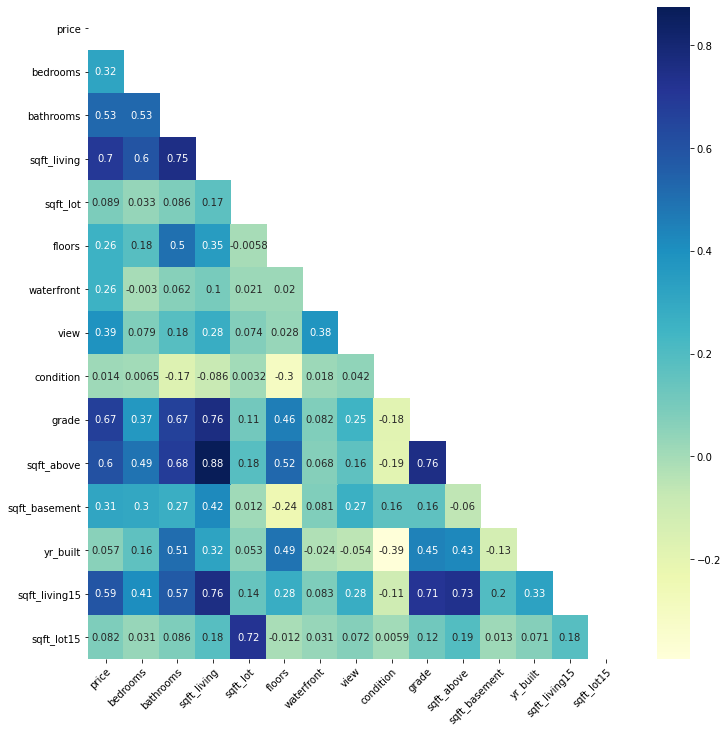

In [25]:
# Visualizing correlations between numerical columns with a seaborn heatmap to show the correlations
fig, ax = plt.subplots(figsize=(12, 12))

corr = df_new.corr()

# Instantiate numpy array of zeroes and assign to `mask`
mask = np.zeros_like(corr,
                     dtype=bool)

# Returns indices from upper triangle of array
mask[np.triu_indices_from(mask)] = True

#plotting the heatmap
sns.heatmap(corr, cmap="YlGnBu", annot=True, mask=mask),
plt.setp(ax.get_xticklabels(), 
         rotation=45, 
         ha="right",
         rotation_mode="anchor");

##### We observe that the variable 'sqft_living' is the variable with the highest correlation (0.7) with the target variable 'price'. From there, we can start a regression model using statsmodel. We also notice the high multicolinearity between sqft_above' and 'sqft_living'.

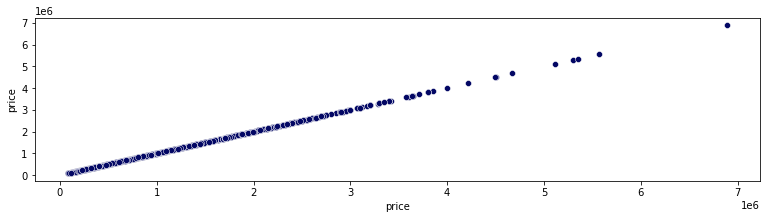

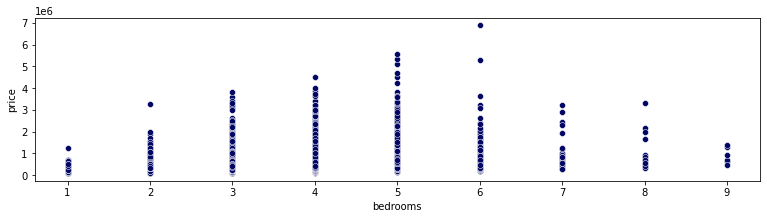

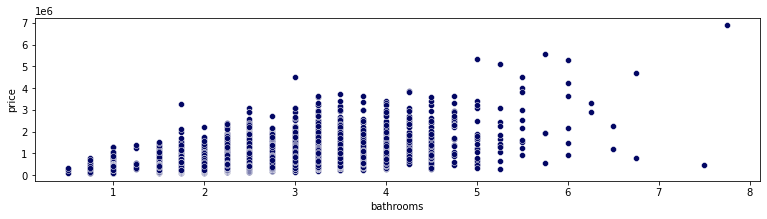

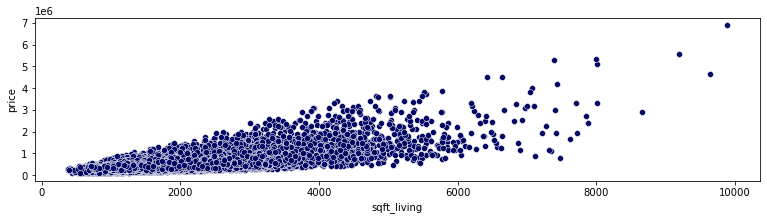

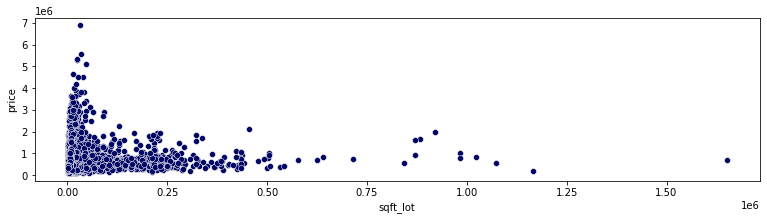

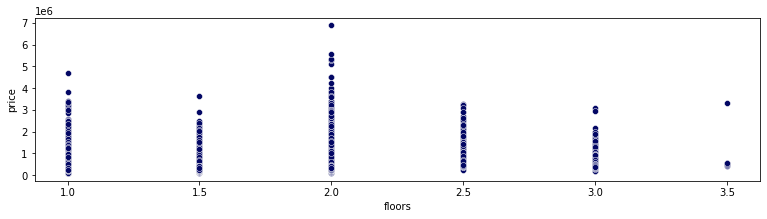

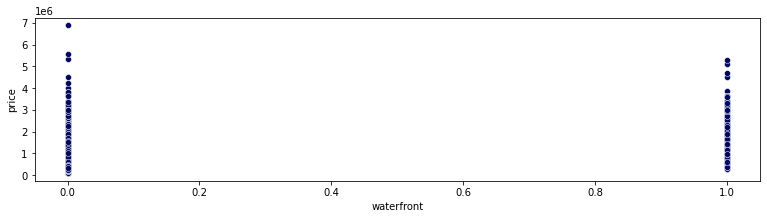

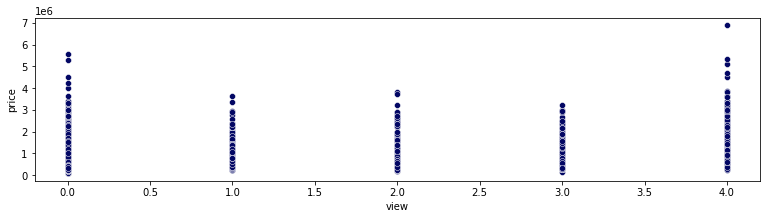

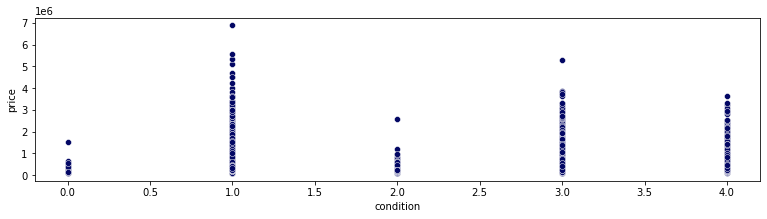

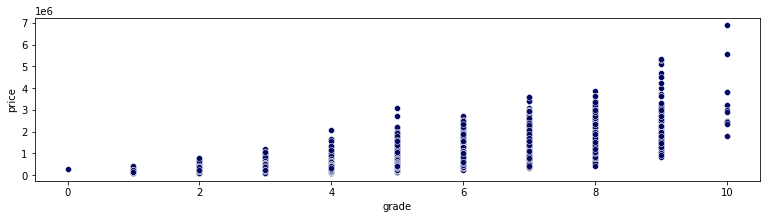

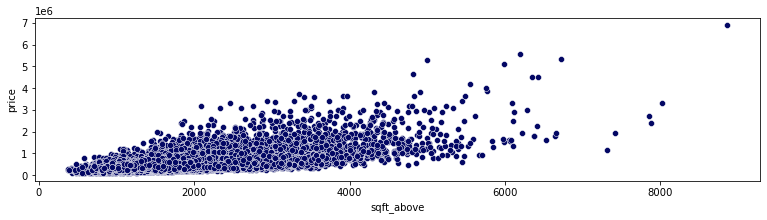

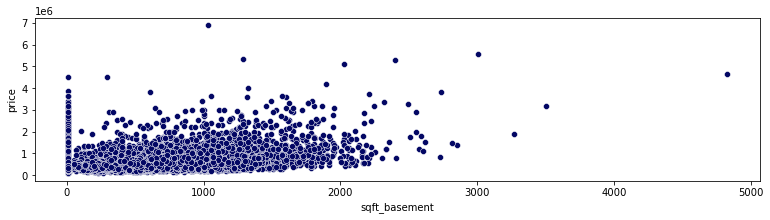

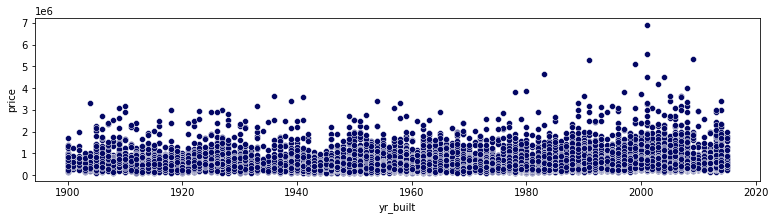

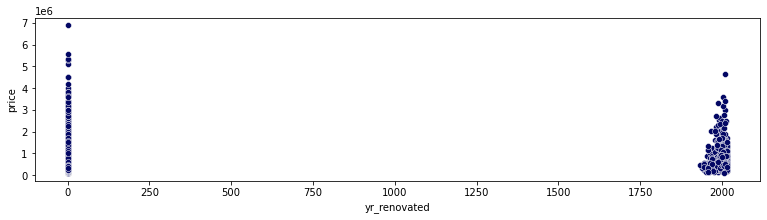

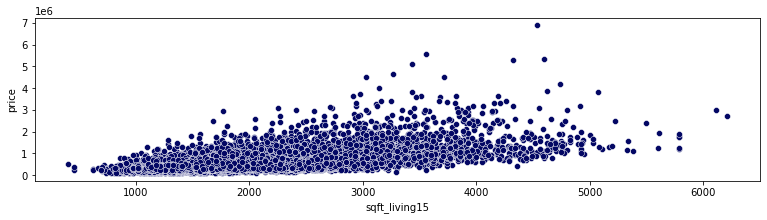

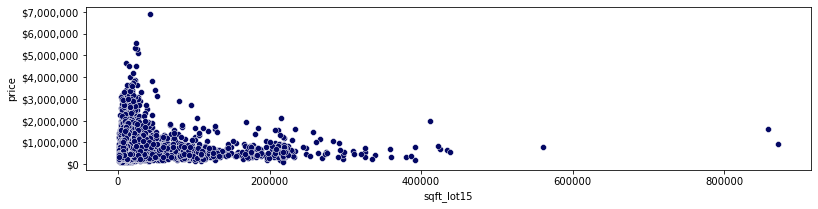

In [26]:
# Using scatter plots to check correlations
for i, col in enumerate(df_new.columns):
    plt.figure(i, figsize=(13,3)) 
    sns.scatterplot(x=col, y=df_new['price'], data=df_new, color='#030764') 
    
#formatting
import matplotlib.ticker as mtick 
fmt = '${x:,.0f}' 
tick = mtick.StrMethodFormatter(fmt) 
plt.gca().yaxis.set_major_formatter(tick) 

## REGRESSION MODEL

## Checking for linearity

 - Our target value is the price. Hence, y = price. 

In [27]:
#Setting up our base model based on the heatmap correlations (y = target variable 
#and X = highest correlated variable) using statsmodel. 

y_samp = df_new['price']
X_samp = df_new['sqft_living']

#Now let's calculate the slope of the fit line (beta1) and the 
beta1 = np.cov(X_samp, y_samp)[0][1]/X_samp.var() 
#indexing by 0 and 1 as we want to get the only 2 relevant value of the covariance matrix
beta2 = y_samp.mean() - beta1*X_samp.mean()


In [28]:
#Covariance matrix
np.cov(X_samp, y_samp)

array([[8.29124672e+05, 2.30117097e+08],
       [2.30117097e+08, 1.30506154e+11]])

In [29]:
#the slope
beta1

277.54221363577267

In [30]:
#the constant
beta2

-37390.868739979574

## Checking the best fit line

#### Adding a constant to x in order for it to fit the model

In [31]:
#designing the X independant variable for the linear regression
X = df_new['sqft_living']

In [32]:
#showing the matrix of features
X

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21592    1530
21593    2310
21594    1020
21595    1600
21596    1020
Name: sqft_living, Length: 21589, dtype: int64

In [33]:
#Let's fit the data
results = sm.OLS(y_samp, sm.add_constant(X)).fit()

In [34]:
#Now let's look at the overall report of our fitted data
results.params

const         -37390.868740
sqft_living      277.542214
dtype: float64

In [35]:
#OLS regression results
results.summary()
#R2 = 0.489

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                 2.069e+04
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:27:27   Log-Likelihood:            -2.9966e+05
No. Observations:               21589   AIC:                         5.993e+05
Df Residuals:                   21587   BIC:                         5.993e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.739e+04   4378.923     -8.539      0.000    -4.6e+04   -2.88e+04
sqft_living   277.5422      1.930    143.837      0.000     273.760     281.324
==============================================================================
Omnibus:                    13425.398   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           331839.191
Skew:                           2.568   Prob(JB):                         0.00
Kurtosis:                      21.507   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### The R2 value here is 0.489, which is the measure of a goodness of fit, which in other word explains the variance between our target variable 'price' and independant variable 'sqft_living'. The prediciton line only explains 48.9% of the data, therefore it is not a very accurate predictor of home price.

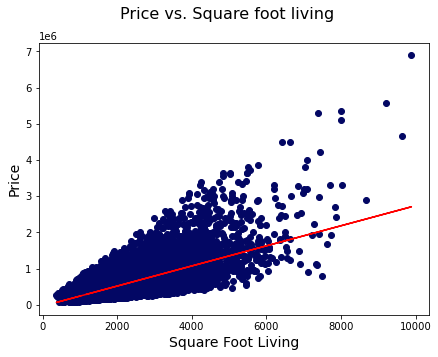

In [36]:
m, c = np.polyfit(X, y_samp, 1) #setting variables for line
fig = plt.figure(figsize=(7, 5)) #Plotting figure
fig.suptitle('Price vs. Square foot living', fontsize=16) #Setting title
plt.scatter(X, y_samp, color='#030764') #Plotting scatterpoints for X and Y
plt.plot(X, m*X+c, c='red') #Plotting line
plt.xlabel('Square Foot Living', fontsize=14) #Setting label for X
plt.ylabel('Price', fontsize=14) #Setting label for Y
plt.show()

#### Checking for Normality + Homoscedasticity for the Linear Regression model

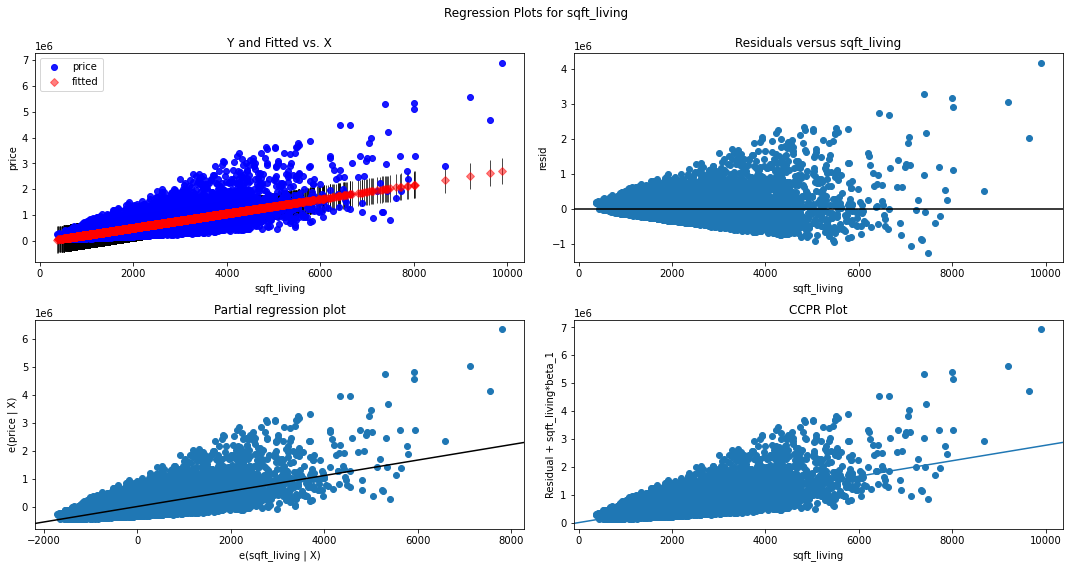

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(results, "sqft_living", fig=fig)
plt.show()

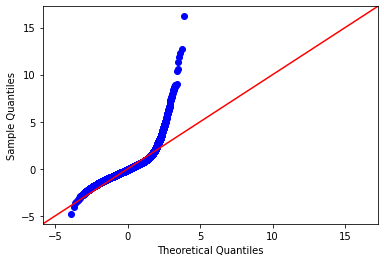

In [38]:
#qqplot of the residuals
import scipy.stats as stats
resids = results.resid
sm.graphics.qqplot(resids, dist=stats.norm, line='45', fit=True)
plt.show()

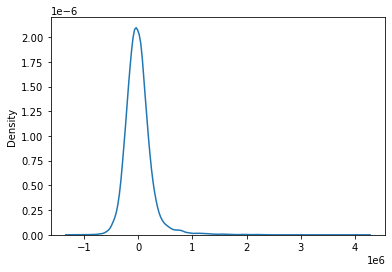

In [39]:
#Normality check
sns.kdeplot(x=results.resid);

Conclusion is that the normality assumption criteria is not met, because the blue line is not following the red line in the qq plot.
Therefore, we need to add more variables.

## Modeling with multiple features: Multicolinearity Model 1

In [40]:
#Find design matrix for linear regression model using all the variables with 'price' as target variable
y, X = dmatrices('price ~ bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+sqft_living15', data=df_new, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif.sort_values('VIF', ascending=False)


,VIF,variable
0,7865.615191,Intercept
3,144.334968,sqft_living
10,117.788693,sqft_above
11,32.802228,sqft_basement
2,3.292806,bathrooms
9,3.248202,grade
13,2.810946,sqft_living15
5,1.935039,floors
12,1.821348,yr_built
1,1.701750,bedrooms


##### As expected, the 3 variables 'sqft_above', 'sqft_living' and 'sqft_basement' have a very high variance inflation factor.

# Include interpretation of the values

In [41]:
#Adding variables that have a correlation > 0.5 on the heatmap 
X_m1 = pd.DataFrame(data=df_new, columns=['sqft_living15', 'sqft_above', 'grade', 'sqft_living', 'bathrooms'])
#setting target variable
y = df_new['price'] 
X_m1.head()


,sqft_living15,sqft_above,grade,sqft_living,bathrooms
0,1340,1180,4,1180,1.00
1,1690,2170,4,2570,2.25
2,2720,770,3,770,1.00
3,1360,1050,4,1960,3.00
4,1800,1680,5,1680,2.00


In [42]:
#Mutilcolinearity check for the 5 variables that have correlation > 0.5 on the heatmap 
Multi1 = sm.OLS(y, sm.add_constant(X_m1)).fit() 
Multi1.summary() 
#R2 = 0.545

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     5177.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:27:29   Log-Likelihood:            -2.9841e+05
No. Observations:               21589   AIC:                         5.968e+05
Df Residuals:                   21583   BIC:                         5.969e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.183e+05   7446.950    -42.748      0.000   -3.33e+05   -3.04e+05
sqft_living15    27.7774      3.971      6.995      0.000      19.994      35.560
sqft_above      -81.3410      4.381    -18.567      0.000     -89.928     -72.754
grade          1.137e+05   2431.264     46.759      0.000    1.09e+05    1.18e+05
sqft_living     235.6605      4.482     52.576      0.000     226.875     244.446
bathrooms     -3.368e+04   3382.944     -9.955      0.000   -4.03e+04    -2.7e+04
==============================================================================
Omnibus:                    15258.361   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           586320.205
Skew:                           2.939   Prob(JB):                         0.00
Kurtosis:                      27.844   Cond. No.                     1.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### The P-values are much lower than our alpha (0.05) so there seems to be a statistical relationship between our variables and the price.

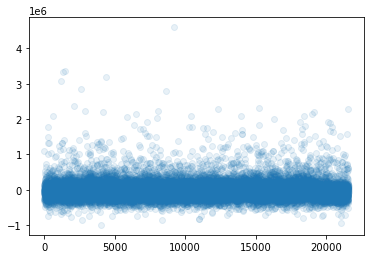

In [43]:
#Plotting scatterplot for check of multicolinearity before log transform
resid0 = Multi1.resid #Setting residuals

plt.scatter(x=range(resid0.shape[0]), y=resid0, alpha=0.1); #Plotting scatterplot for check

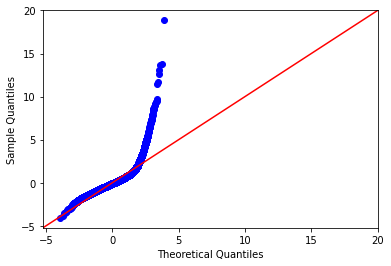

In [44]:
#Plotting the residuals for resids1
fig = sm.graphics.qqplot(resid0, dist=stats.norm, line='45', fit=True) 
fig.show()

### Homoskedasticity + normality check: Log transformation

Skewness: sqft_living15    1.105218
sqft_above       1.392355
grade            0.784108
sqft_living      1.330630
bathrooms        0.481693
dtype: float64
Kurtosis: sqft_living15    1.587059
sqft_above       2.861298
grade            1.120526
sqft_living      3.439566
bathrooms        0.999164
dtype: float64


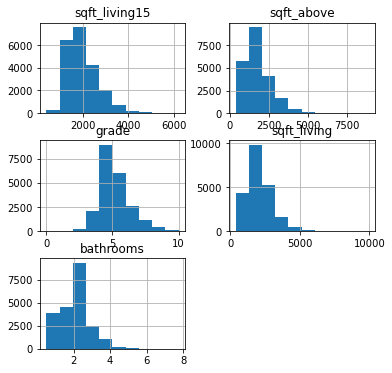

In [45]:
#looking at the normality of the raw features
X_m1.hist(figsize  = [6, 6]);
print("Skewness:", X_m1.skew())
print("Kurtosis:", X_m1.kurtosis())

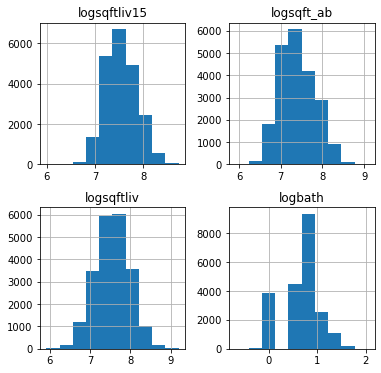

In [46]:
#log transforming in order to normalize data (except for 'grade' that already has a normal distribution)
X_m1_log = pd.DataFrame([])
X_m1_log['logsqftliv15'] = np.log(X_m1['sqft_living15'])
X_m1_log['logsqft_ab'] = np.log(X_m1['sqft_above'])
X_m1_log['logsqftliv'] = np.log(X_m1['sqft_living'])
X_m1_log['logbath'] = np.log(X_m1['bathrooms'])

X_m1_log.hist(figsize  = [6, 6]);

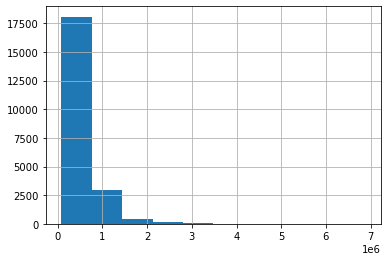

In [47]:
y.hist();

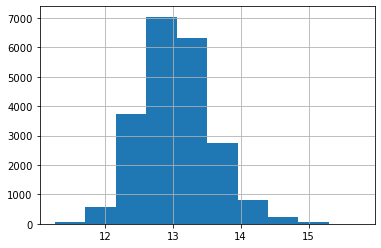

In [48]:
# Log transforming y (=price)
ylog = np.log(y)
ylog.hist(); #Checking log transformation

In [49]:
#Mutilcolinearity check for the 5 variables that have correlation > 0.5 on heatmap (X_m1)
Multi1 = sm.OLS(ylog, sm.add_constant(X_m1)).fit() 
Multi1.summary() 
#R2 = 0.569
#P-values < alpha level of 0.05.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     5698.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:27:30   Log-Likelihood:                -7671.6
No. Observations:               21589   AIC:                         1.536e+04
Df Residuals:                   21583   BIC:                         1.540e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.6703      0.011   1105.800      0.000      11.650      11.691
sqft_living15  9.037e-05   5.63e-06     16.059      0.000    7.93e-05       0.000
sqft_above       -0.0001   6.21e-06    -23.384      0.000      -0.000      -0.000
grade             0.1911      0.003     55.474      0.000       0.184       0.198
sqft_living       0.0003   6.35e-06     44.636      0.000       0.000       0.000
bathrooms        -0.0104      0.005     -2.175      0.030      -0.020      -0.001
==============================================================================
Omnibus:                       27.986   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.704
Skew:                           0.079   Prob(JB):                     9.64e-07
Kurtosis:                       2.922   Cond. No.                     1.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
#Save absolute value of correlation matrix as a data frame
#Converts all values to absolute value
#Stacks the row:column pairs into a multindex
#Reset the index to set the multindex to seperate columns
#Sort values. 0 is the column automatically generated by the stacking

df_multi=X_m1.corr().abs().stack().reset_index().sort_values(0, ascending=False)

#Zip the variable name columns (named level_0 and level_1 by default) in a new column named "pairs"
df_multi['pairs'] = list(zip(df_multi.level_0, df_multi.level_1))

#Set index to pairs
df_multi.set_index(['pairs'], inplace = True)

#Drop level columns
df_multi.drop(columns=['level_1', 'level_0'], inplace = True)

#Rename correlation column as cor rather than 0
df_multi.columns = ['cor']

#Drop duplicates. This is dangerous if there are variables perfectly correlated with variables other than themselves.
df_multi.drop_duplicates(inplace=True)

df_multi[(df_multi.cor > .75) & (df_multi.cor <1)]




,cor
pairs,
"(sqft_above, sqft_living)",0.875386
"(sqft_living, grade)",0.764354
"(sqft_living, sqft_living15)",0.758302
"(grade, sqft_above)",0.756236
"(sqft_living, bathrooms)",0.754499


Let's concatenate the 'grade' column with the X_m1_log data 

In [51]:
#df_new_log contains all the X_m1 variables except 'grade' that didn't need to be logged transformed
#concatenate logged transformed data with unlogged data 'grade'

df_new_log = pd.concat([X_m1_log, X_m1['grade']], axis=1)
df_new_log.head()

,logsqftliv15,logsqft_ab,logsqftliv,logbath,grade
0,7.200425,7.073270,7.073270,0.000000,4
1,7.432484,7.682482,7.851661,0.810930,4
2,7.908387,6.646391,6.646391,0.000000,3
3,7.215240,6.956545,7.580700,1.098612,4
4,7.495542,7.426549,7.426549,0.693147,5


In [52]:
#Now let's look at the new model
Multi1 = sm.OLS(ylog, sm.add_constant(df_new_log)).fit() 
Multi1.summary()
#R2 = 0.562
#P-values < alpha level 0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     5530.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:27:30   Log-Likelihood:                -7853.4
No. Observations:               21589   AIC:                         1.572e+04
Df Residuals:                   21583   BIC:                         1.577e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.2369      0.081    101.919      0.000       8.078       8.395
logsqftliv15     0.1968      0.012     17.082      0.000       0.174       0.219
logsqft_ab      -0.2523      0.012    -21.605      0.000      -0.275      -0.229
logsqftliv       0.5645      0.013     42.081      0.000       0.538       0.591
logbath         -0.0803      0.009     -8.470      0.000      -0.099      -0.062
grade            0.2116      0.003     63.632      0.000       0.205       0.218
==============================================================================
Omnibus:                       51.714   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.966
Skew:                           0.117   Prob(JB):                     5.20e-12
Kurtosis:                       2.949   Cond. No.                         476.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking for Normality + Homoscedasticity

In [53]:
#Let's fit the data for homoscedasticity and normality checks
resids1 = Multi1.resid
resids1

0       -0.398234
1        0.221146
2       -0.401962
3        0.372517
4        0.109667
           ...   
21592   -0.159548
21593   -0.218039
21594    0.272328
21595   -0.052083
21596    0.059450
Length: 21589, dtype: float64

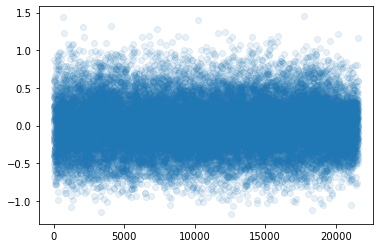

In [54]:
#Plotting scatterplot for check
plt.scatter(x=range(resids1.shape[0]), y=resids1, alpha=0.1); 

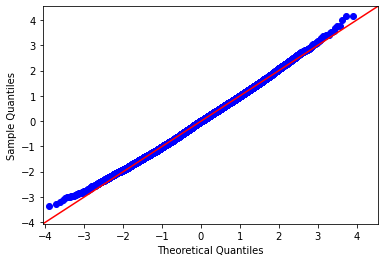

In [55]:
#Plotting the residuals for resids1
fig = sm.graphics.qqplot(resids1, dist=stats.norm, line='45', fit=True) 
fig.show()

## Multicolinearity check Model 2

In [56]:
#removing 'sqft_above' from dataset to remove multicolinearty
X_m2 = X_m1.drop(columns = 'sqft_living')
y = df_new['price'] #setting target variable
X_m2.head()

,sqft_living15,sqft_above,grade,bathrooms
0,1340,1180,4,1.00
1,1690,2170,4,2.25
2,2720,770,3,1.00
3,1360,1050,4,3.00
4,1800,1680,5,2.00


In [57]:
#Mutilcolinearity check 
Multi2 = sm.OLS(ylog, sm.add_constant(X_m2)).fit() 
Multi2.summary() 
#R2 = 0.529

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     6064.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:27:30   Log-Likelihood:                -8624.7
No. Observations:               21589   AIC:                         1.726e+04
Df Residuals:                   21584   BIC:                         1.730e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.5742      0.011   1071.879      0.000      11.553      11.595
sqft_living15     0.0002   5.64e-06     28.598      0.000       0.000       0.000
sqft_above     1.343e-05   5.32e-06      2.525      0.012       3e-06    2.39e-05
grade             0.2098      0.004     58.696      0.000       0.203       0.217
bathrooms         0.0719      0.005     15.536      0.000       0.063       0.081
==============================================================================
Omnibus:                       99.622   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.758
Skew:                           0.145   Prob(JB):                     9.75e-22
Kurtosis:                       2.845   Cond. No.                     1.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Checking for Normality + Homoscedasticity

Skewness: sqft_living15    1.105218
sqft_above       1.392355
grade            0.784108
bathrooms        0.481693
dtype: float64
Kurtosis: sqft_living15    1.587059
sqft_above       2.861298
grade            1.120526
bathrooms        0.999164
dtype: float64


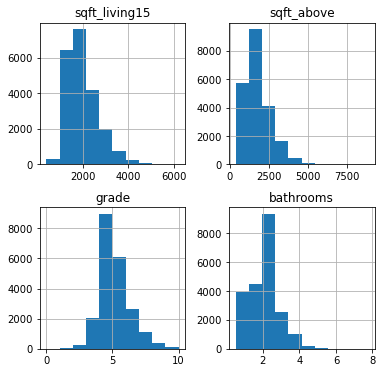

In [58]:
#looking at the normality of the raw features
X_m2.hist(figsize  = [6, 6]);
print("Skewness:", X_m2.skew())
print("Kurtosis:", X_m2.kurtosis())

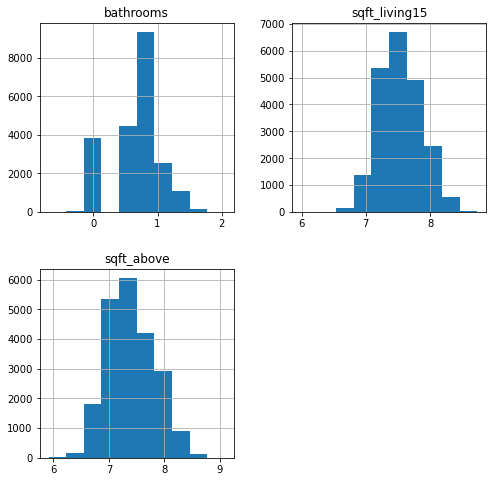

In [59]:
#log transforming in order to normalize data (except for grade that already has a normal distribution)
X_m2_log = pd.DataFrame([])
X_m2_log['bathrooms'] = np.log(X_m2['bathrooms'])
X_m2_log['sqft_living15'] = np.log(X_m2['sqft_living15'])
X_m2_log['sqft_above'] = np.log(X_m2['sqft_above'])
X_m2_log.hist(figsize  = [8, 8]);

Repeating the same process of concatenatingf or 'grade' that doesn't need to be log transformed: 

In [60]:
#df_new_log2 contains all the X_m2 variables except 'grade' that didn't need to be logged transformed
df_new_log2 = pd.concat([X_m2_log, X_m2['grade']], axis=1)
df_new_log2.head()

,bathrooms,sqft_living15,sqft_above,grade
0,0.000000,7.200425,7.073270,4
1,0.810930,7.432484,7.682482,4
2,0.000000,7.908387,6.646391,3
3,1.098612,7.215240,6.956545,4
4,0.693147,7.495542,7.426549,5


In [61]:
#checking multicolinearity for df_new_log2 and ylog
Multi2 = sm.OLS(ylog, sm.add_constant(df_new_log2)).fit()
Multi2.summary()
#R2 = 0.526
#P-values < 0.05 except for 'sqft_above'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     5980.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:27:30   Log-Likelihood:                -8704.6
No. Observations:               21589   AIC:                         1.742e+04
Df Residuals:                   21584   BIC:                         1.746e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.2205      0.080    114.578      0.000       9.063       9.378
bathrooms         0.0836      0.009      9.296      0.000       0.066       0.101
sqft_living15     0.3400      0.011     29.701      0.000       0.318       0.362
sqft_above        0.0207      0.010      2.046      0.041       0.001       0.040
grade             0.2265      0.003     65.856      0.000       0.220       0.233
==============================================================================
Omnibus:                       89.164   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.137
Skew:                           0.149   Prob(JB):                     4.41e-20
Kurtosis:                       2.900   Cond. No.                         383.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking for Homoscedasticity

In [62]:
#Let's fit the data
resids2 = Multi2.resid
resids2

0       -0.410445
1        0.315943
2       -0.625117
3        0.496474
4        0.029720
           ...   
21592   -0.280049
21593   -0.244071
21594    0.303849
21595   -0.147844
21596    0.090971
Length: 21589, dtype: float64

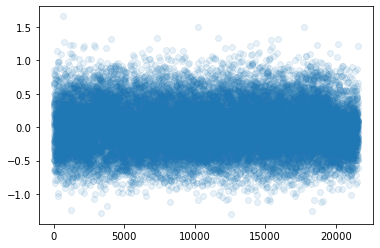

In [63]:
#Plotting scatterplot for check
plt.scatter(x=range(resids2.shape[0]), y=resids2, alpha=0.1); 


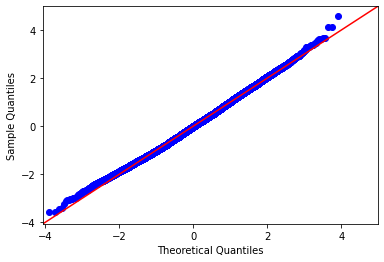

In [64]:
#Plotting the residuals for resids1
fig = sm.graphics.qqplot(resids2, dist=stats.norm, line='45', fit=True) 
fig.show()

Stakeholder : home owners 

Interpretation

## Multicolinearity Model 3

In [65]:
#Creating another variable with correlation below 0.2 from heatmap -- correct: looking at 'condition'
X_m3 = df_new.drop(columns = ['price','sqft_living', 'sqft_lot', 'condition', 'yr_built', 'yr_renovated', 'sqft_lot15',
                              'floors', 'waterfront'])
y = df_new['price'] 
X_m3.head()

,bedrooms,bathrooms,view,grade,sqft_above,sqft_basement,sqft_living15
0,3,1.00,0,4,1180,5.0,1340
1,3,2.25,0,4,2170,405.0,1690
2,2,1.00,0,3,770,5.0,2720
3,4,3.00,0,4,1050,915.0,1360
4,3,2.00,0,5,1680,5.0,1800


In [66]:
#checking model with low correlation data
Multi3 = sm.OLS(ylog, sm.add_constant(X_m3)).fit() 
Multi3.summary() 
#R2 = 0.582

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     4288.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:27:31   Log-Likelihood:                -7347.1
No. Observations:               21589   AIC:                         1.471e+04
Df Residuals:                   21581   BIC:                         1.477e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.7451      0.013    891.829      0.000      11.719      11.771
bedrooms         -0.0138      0.003     -4.168      0.000      -0.020      -0.007
bathrooms         0.0019      0.005      0.400      0.689      -0.007       0.011
view              0.0854      0.003     26.147      0.000       0.079       0.092
grade             0.1820      0.003     52.694      0.000       0.175       0.189
sqft_above        0.0001   6.02e-06     23.857      0.000       0.000       0.000
sqft_basement     0.0003   6.77e-06     37.558      0.000       0.000       0.000
sqft_living15    7.4e-05   5.58e-06     13.258      0.000    6.31e-05    8.49e-05
==============================================================================
Omnibus:                       15.346   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.295
Skew:                           0.033   Prob(JB):                     0.000787
Kurtosis:                       2.893   Cond. No.                     1.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R2 has gone up to 0.582 which shows that we are moving towards the right direction in removing colinearity. 

#### Checking for Homoscedasticity + normality

In [67]:
#Let's fit the data
resids3 = Multi3.resid
resids3

0       -0.393643
1        0.219779
2       -0.477930
3        0.403577
4        0.148704
           ...   
21592   -0.159033
21593   -0.174091
21594    0.234140
21595   -0.054849
21596    0.021262
Length: 21589, dtype: float64

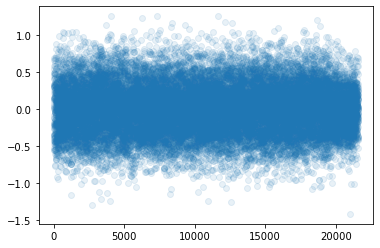

In [68]:
#Plotting scatterplot for check
plt.scatter(x=range(resids3.shape[0]), y=resids3, alpha=0.1); 


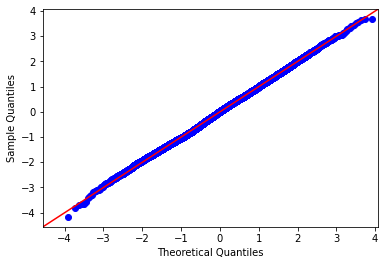

In [69]:
#Plotting the residuals for resids3
fig = sm.graphics.qqplot(resids3, dist=stats.norm, line='45', fit=True) 
fig.show()

In [70]:
#multicolinearity check for X_m3
X_m3.corr()

,bedrooms,bathrooms,view,grade,sqft_above,sqft_basement,sqft_living15
bedrooms,1.000000,0.527954,0.079254,0.367447,0.493350,0.301024,0.405936
bathrooms,0.527954,1.000000,0.183069,0.665281,0.684864,0.273268,0.569228
view,0.079254,0.183069,1.000000,0.247552,0.162672,0.267902,0.277595
grade,0.367447,0.665281,0.247552,1.000000,0.756236,0.162896,0.713415
sqft_above,0.493350,0.684864,0.162672,0.756236,1.000000,-0.059955,0.732040
sqft_basement,0.301024,0.273268,0.267902,0.162896,-0.059955,1.000000,0.196842
sqft_living15,0.405936,0.569228,0.277595,0.713415,0.732040,0.196842,1.000000


On the model above we can see that 'sqft_above' and 'grade" have a correlaiton of 75.6%. 

In [71]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df_multi=X_m3.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_multi['pairs'] = list(zip(df_multi.level_0, df_multi.level_1))

# set index to pairs
df_multi.set_index(['pairs'], inplace = True)

#drop level columns
df_multi.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cor rather than 0
df_multi.columns = ['cor']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df_multi.drop_duplicates(inplace=True)

df_multi[(df_multi.cor > .75) & (df_multi.cor <1)]

,cor
pairs,
"(grade, sqft_above)",0.756236


#### Conclusion

The purpose of the above analysis was to make a viable recommendation for real estate companies in order to help their homeowners clients sell their properties at best value.

The grade of a property is the highest factor that needs to be adressed: in order to increase the sale value: if we look at the grade coefficient, 0.1820, we can in fact read that for every 1 notch increase in the grade, the value of the property increases dy 18.2%.

There are several ways in which a property can be improved, depending on what would need to be done on the interior and/or exterior. For example, the homeowner can improve the quality of the AC/heating units, the plumbing pipes, the kitchen appliances, the flooring, the bathroom appliances, the alarm system, etc. Another detail that tends to increase the value of a home is to have it re-arranged by an interior designer.

For the exterior of the house, the outisde appearance of the property plays a very important role in the price component. Repainting the walls and re-cementing the front driveway for example can be considered as factors, such as re-doingthe roof or planting bushes.

When looking at the other coefficients, we can see that bedrooms and bathrooms are negative, which translates into the fact that it can negatively impact the price by 1.1% to 1.6% respectively of a home if only working on having nice bedrooms and bathrooms as opposed to the property. Some properties might be bigger but old, hence won't have a better grade than a smaller property that has a high grade.

The r-squared value, 0.582, indicates that the model can account for about 58% of the variability of price around its mean. The null hypothesis for multiple regression is that there is no relationship between the chosen explanatory variables and the response variable. 
Also, all of the p-values round to 0, which means we can reject the null hypothesis. Now we can confirm that the model satisfies the assumptions of normality and homoscedasticity.


What could be the next steps?

1. Have a better understanding of what is taken into account when assessing the grade of a property. For example, does the property have a driveway, is it easy access for strollers/wheelchairs, or simply understand what components of the house matter the most to home buyers: new bathroom/kitchen appliances over fresh paint on the walls for example. Another factor that could help increase the sale of the property could be the choice of windows, whether they are double glazed or not.


2. Other factors that could help increase the value of a property that are harder to quantify such as the choices of plants/flowers/trees in the backyard, heated pool, outdoor shower...etc. All of these are factors that the property owner can improve. 